In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
line_count = 0
nextera_mean_DP = []
nextera_mean_GQ = []
nextera_mean_CR = []
for line in open('./data/Nextera_CFTR_variant_qc.txt'):
    parsed_line = line.strip("\n").split("\t")
    if line_count == 0:
        col2idx = {}
        for i in range(len(parsed_line)):
            col2idx[parsed_line[i]] = i
        line_count += 1
    else:
        qc = json.loads(parsed_line[col2idx['variant_qc']])
        nextera_mean_DP.append(qc['dp_stats']['mean'])
        nextera_mean_GQ.append(qc['gq_stats']['mean'])
        nextera_mean_CR.append(qc['call_rate'])
        

In [3]:
line_count = 0
twist_mean_DP = []
twist_mean_GQ = []
twist_mean_CR = []
for line in open('./data/Twist_CFTR_variant_qc.txt'):
    parsed_line = line.strip("\n").split("\t")
    if line_count == 0:
        col2idx = {}
        for i in range(len(parsed_line)):
            col2idx[parsed_line[i]] = i
        line_count += 1
    else:
        qc = json.loads(parsed_line[col2idx['variant_qc']])
        twist_mean_DP.append(qc['dp_stats']['mean'])
        twist_mean_GQ.append(qc['gq_stats']['mean'])
        twist_mean_CR.append(qc['call_rate'])

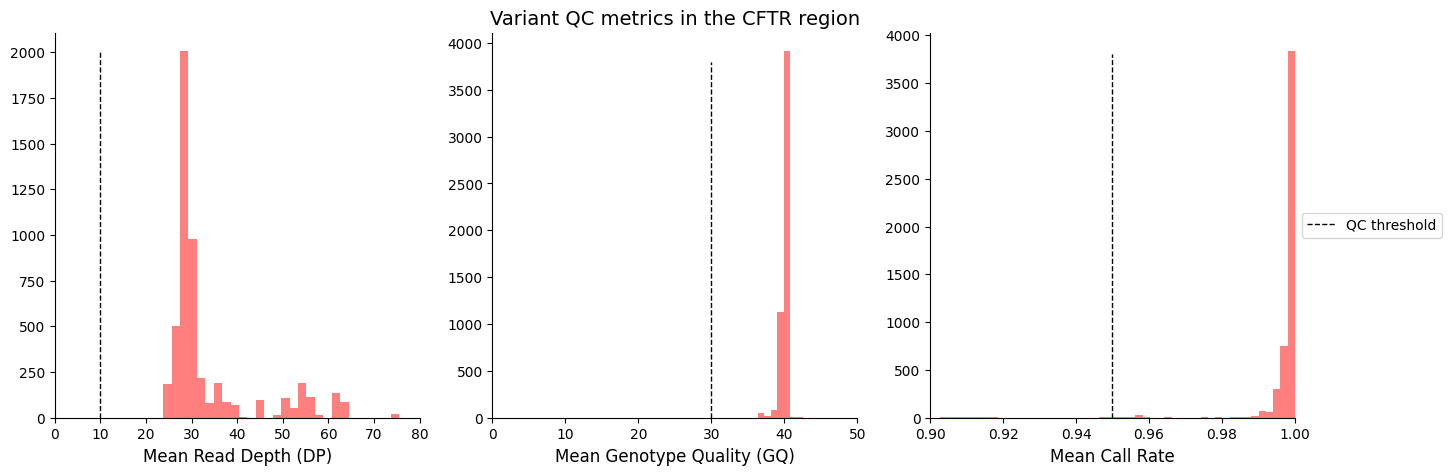

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=False, sharey=False, dpi=100)

bins = 50
# Plot histograms with specified colors
axes[0].hist(nextera_mean_DP + twist_mean_DP, bins=bins, alpha=0.5, color='red', orientation='vertical')
axes[0].set_xlabel('Mean Read Depth (DP)', fontsize=12)
axes[0].set_xlim(0, 80)
axes[0].vlines(10, 0, 2000, color='black', linestyle="--", linewidth=1)

axes[1].hist(nextera_mean_GQ + twist_mean_GQ, bins=bins, alpha=0.5, color='red', orientation='vertical')
axes[1].set_xlabel('Mean Genotype Quality (GQ)', fontsize=12)
axes[1].set_xlim(0, 50)
axes[1].vlines(30, 0, 3800, color='black', linestyle="--", linewidth=1)

axes[2].hist(nextera_mean_CR + twist_mean_CR, bins=bins, alpha=0.5, color='red', orientation='vertical')
axes[2].set_xlabel('Mean Call Rate', fontsize=12)
axes[2].set_xlim(0.9, 1)
axes[2].vlines(0.95, 0, 3800, color='black', linestyle="--", linewidth=1, label="QC threshold")

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
axes[1].set_title("Variant QC metrics in the CFTR region", fontsize=14)
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
